In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [4]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
data = [train_data, test_data]
for df in data:
    df.loc[df['avg_training_score'] > 73,'tr_score_cat'] = 'H'
    df.loc[df['avg_training_score'] < 60,'tr_score_cat'] = 'L'
    df.loc[(df['avg_training_score'] <= 73) & (df['avg_training_score'] >=
                                               60),'tr_score_cat'] = 'M'

In [6]:
r1 = ['region_1','region_10','region_11','region_12','region_13','region_14','region_15','region_16','region_31','region_30','region_27','region_26','region_20','region_2','region_19','region_8']
r2 = ['region_17','region_4','region_7','region_3','region_28','region_25','region_23','region_22']
r3 = ['region_18','region_9','region_6','region_5','region_34','region_33','region_32','region_29','region_24','region_21']

In [7]:
for df in data:
    df.loc[df['region'].isin(r1) ,'region_gp'] = 1
    df.loc[df['region'].isin(r2) ,'region_gp'] = 2
    df.loc[df['region'].isin(r3) ,'region_gp'] = 3

In [8]:
for df in data:
    df['KPI_AWard']  = df['KPIs_met >80%'] + df['awards_won?']
    df['KPI_Rating']  = df['KPIs_met >80%'] + df['previous_year_rating']
    df['AWard_Rating']  = df['awards_won?'] + df['previous_year_rating']

In [9]:
mean_cols = ['KPIs_met >80%', 'awards_won?','previous_year_rating', 'department','region', 'education','gender', 'recruitment_channel']
for i in mean_cols:
    means = train_data.groupby(i).is_promoted.mean()
    train_data[i + "mean_target"] = train_data[i].map(means)
    test_data[i + "mean_target"] = test_data[i].map(means)

In [11]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,KPI_Rating,AWard_Rating,KPIs_met >80%mean_target,awards_won?mean_target,previous_year_ratingmean_target,departmentmean_target,regionmean_target,educationmean_target,gendermean_target,recruitment_channelmean_target
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,...,6.0,5.0,0.169094,0.076749,0.163615,0.072031,0.106546,0.098559,0.089934,0.085013
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,...,5.0,5.0,0.039587,0.076749,0.163615,0.090148,0.114188,0.082031,0.083151,0.083952
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,...,3.0,3.0,0.039587,0.076749,0.072779,0.072031,0.060641,0.082031,0.083151,0.085013
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,...,1.0,1.0,0.039587,0.076749,0.014141,0.072031,0.116596,0.082031,0.083151,0.083952
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,...,3.0,3.0,0.039587,0.076749,0.072779,0.107593,0.063274,0.082031,0.083151,0.083952


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 27 columns):
employee_id                        54808 non-null int64
department                         54808 non-null object
region                             54808 non-null object
education                          52399 non-null object
gender                             54808 non-null object
recruitment_channel                54808 non-null object
no_of_trainings                    54808 non-null int64
age                                54808 non-null int64
previous_year_rating               50684 non-null float64
length_of_service                  54808 non-null int64
KPIs_met >80%                      54808 non-null int64
awards_won?                        54808 non-null int64
avg_training_score                 54808 non-null int64
is_promoted                        54808 non-null int64
tr_score_cat                       54808 non-null object
region_gp                          54808 no

In [12]:
numeric = ['avg_training_score', 'age', 'length_of_service', 'no_of_trainings','KPIs_met >80%mean_target','awards_won?mean_target','previous_year_ratingmean_target','departmentmean_target','regionmean_target','educationmean_target','gendermean_target','recruitment_channelmean_target']
category = ['KPIs_met >80%', 'awards_won?' ,'previous_year_rating', 'department', 'region', 'education', 'gender', 'recruitment_channel','tr_score_cat','region_gp','KPI_AWard','KPI_Rating','AWard_Rating']

In [13]:
for i in category:
    train_data[i] = train_data[i].astype('category')
    test_data[i] = test_data[i].astype('category')

train_data['is_promoted'] = train_data['is_promoted'].astype('category')

In [14]:
train_data.isnull().sum()

employee_id                           0
department                            0
region                                0
education                          2409
gender                                0
recruitment_channel                   0
no_of_trainings                       0
age                                   0
previous_year_rating               4124
length_of_service                     0
KPIs_met >80%                         0
awards_won?                           0
avg_training_score                    0
is_promoted                           0
tr_score_cat                          0
region_gp                             0
KPI_AWard                             0
KPI_Rating                         4124
AWard_Rating                       4124
KPIs_met >80%mean_target              0
awards_won?mean_target                0
previous_year_ratingmean_target    4124
departmentmean_target                 0
regionmean_target                     0
educationmean_target               2409


In [15]:
test_data.isnull().sum()

employee_id                           0
department                            0
region                                0
education                          1034
gender                                0
recruitment_channel                   0
no_of_trainings                       0
age                                   0
previous_year_rating               1812
length_of_service                     0
KPIs_met >80%                         0
awards_won?                           0
avg_training_score                    0
tr_score_cat                          0
region_gp                             0
KPI_AWard                             0
KPI_Rating                         1812
AWard_Rating                       1812
KPIs_met >80%mean_target              0
awards_won?mean_target                0
previous_year_ratingmean_target    1812
departmentmean_target                 0
regionmean_target                     0
educationmean_target               1034
gendermean_target                     0


In [16]:
# Filling Null values
train_data['education'] = train_data['education'].cat.add_categories('No Degree')
train_data['education'].fillna('No Degree',inplace = True)
test_data['education'] = test_data['education'].cat.add_categories('No Degree')
test_data['education'].fillna('No Degree',inplace = True)

In [17]:
# Filling Null values
train_data['previous_year_rating'] = train_data['previous_year_rating'].cat.add_categories('No Rating')
train_data['previous_year_rating'].fillna('No Rating',inplace = True)
test_data['previous_year_rating'] = test_data['previous_year_rating'].cat.add_categories('No Rating')
test_data['previous_year_rating'].fillna('No Rating',inplace = True)

In [18]:
# Filling Null values
train_data['KPI_Rating'] = train_data['KPI_Rating'].cat.add_categories('No Rating')
train_data['KPI_Rating'].fillna('No Rating',inplace = True)
test_data['KPI_Rating'] = test_data['KPI_Rating'].cat.add_categories('No Rating')
test_data['KPI_Rating'].fillna('No Rating',inplace = True)

In [19]:
# Filling Null values
train_data['AWard_Rating'] = train_data['AWard_Rating'].cat.add_categories('No Rating')
train_data['AWard_Rating'].fillna('No Rating',inplace = True)
test_data['AWard_Rating'] = test_data['AWard_Rating'].cat.add_categories('No Rating')
test_data['AWard_Rating'].fillna('No Rating',inplace = True)

In [20]:
train_data['previous_year_ratingmean_target'].fillna(.001,inplace = True)
test_data['previous_year_ratingmean_target'].fillna(.001,inplace = True)
train_data['educationmean_target'].fillna(.001,inplace = True)
test_data['educationmean_target'].fillna(.001,inplace = True)

In [21]:
train_data.isnull().sum()

employee_id                        0
department                         0
region                             0
education                          0
gender                             0
recruitment_channel                0
no_of_trainings                    0
age                                0
previous_year_rating               0
length_of_service                  0
KPIs_met >80%                      0
awards_won?                        0
avg_training_score                 0
is_promoted                        0
tr_score_cat                       0
region_gp                          0
KPI_AWard                          0
KPI_Rating                         0
AWard_Rating                       0
KPIs_met >80%mean_target           0
awards_won?mean_target             0
previous_year_ratingmean_target    0
departmentmean_target              0
regionmean_target                  0
educationmean_target               0
gendermean_target                  0
recruitment_channelmean_target     0
d

In [22]:
# Scaling
scaler = StandardScaler()
for i in numeric:
    train_data[i] = scaler.fit_transform(train_data[i].values.reshape(-1,1))
    test_data[i] = scaler.fit_transform(test_data[i].values.reshape(-1,1))

In [23]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,KPI_Rating,AWard_Rating,KPIs_met >80%mean_target,awards_won?mean_target,previous_year_ratingmean_target,departmentmean_target,regionmean_target,educationmean_target,gendermean_target,recruitment_channelmean_target
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,-0.415276,0.025598,5,0.500460,...,6,5,1.356878,-0.154018,1.663660,-0.895520,0.822025,0.818305,1.536223,-0.030047
1,65141,Operations,region_22,Bachelor's,m,other,-0.415276,-0.627135,5,-0.437395,...,5,5,-0.736986,-0.154018,1.663660,0.339283,1.115924,-0.050287,-0.650947,-0.232939
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,-0.415276,-0.104948,3,0.265996,...,3,3,-0.736986,-0.154018,-0.123583,-0.895520,-0.943310,-0.050287,-0.650947,-0.030047
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,1.226063,0.547785,1,0.969387,...,1,1,-0.736986,-0.154018,-1.277317,-0.895520,1.208520,-0.050287,-0.650947,-0.232939
4,48945,Technology,region_26,Bachelor's,m,other,-0.415276,1.331064,3,-0.906322,...,3,3,-0.736986,-0.154018,-0.123583,1.528282,-0.842031,-0.050287,-0.650947,-0.232939


In [24]:
#OneHotEncoding
for i in category:
    train_data = pd.concat([train_data, pd.get_dummies(train_data[i], prefix=i)], axis=1)
    train_data.drop(i, axis=1, inplace=True)
    test_data = pd.concat([test_data, pd.get_dummies(test_data[i], prefix=i)], axis=1)
    test_data.drop(i, axis=1, inplace=True)


In [25]:
#droping employee_id
train_data.drop('employee_id', axis=1, inplace=True)
Emp_ID = test_data['employee_id']
test_data.drop('employee_id', axis=1, inplace=True)

In [26]:
train_data.head()

,no_of_trainings,age,length_of_service,avg_training_score,is_promoted,KPIs_met >80%mean_target,awards_won?mean_target,previous_year_ratingmean_target,departmentmean_target,regionmean_target,...,KPI_Rating_5.0,KPI_Rating_6.0,KPI_Rating_No Rating,AWard_Rating_1.0,AWard_Rating_2.0,AWard_Rating_3.0,AWard_Rating_4.0,AWard_Rating_5.0,AWard_Rating_6.0,AWard_Rating_No Rating
0,-0.415276,0.025598,0.500460,-1.075931,0,1.356878,-0.154018,1.663660,-0.895520,0.822025,...,0,1,0,0,0,0,0,1,0,0
1,-0.415276,-0.627135,-0.437395,-0.253282,0,-0.736986,-0.154018,1.663660,0.339283,1.115924,...,1,0,0,0,0,0,0,1,0,0
2,-0.415276,-0.104948,0.265996,-1.001145,0,-0.736986,-0.154018,-0.123583,-0.895520,-0.943310,...,0,0,0,0,0,1,0,0,0,0
3,1.226063,0.547785,0.969387,-1.001145,0,-0.736986,-0.154018,-1.277317,-0.895520,1.208520,...,0,0,0,1,0,0,0,0,0,0
4,-0.415276,1.331064,-0.906322,0.718939,0,-0.736986,-0.154018,-0.123583,1.528282,-0.842031,...,0,0,0,0,0,1,0,0,0,0


In [27]:
test_data.head()

,no_of_trainings,age,length_of_service,avg_training_score,KPIs_met >80%mean_target,awards_won?mean_target,previous_year_ratingmean_target,departmentmean_target,regionmean_target,educationmean_target,...,KPI_Rating_5.0,KPI_Rating_6.0,KPI_Rating_No Rating,AWard_Rating_1.0,AWard_Rating_2.0,AWard_Rating_3.0,AWard_Rating_4.0,AWard_Rating_5.0,AWard_Rating_6.0,AWard_Rating_No Rating
0,-0.423094,-1.404150,-1.143200,1.024263,1.336715,-0.152665,-1.531014,1.537111,-0.827576,-0.053941,...,0,0,1,0,0,0,0,0,0,1
1,-0.423094,-0.492612,-0.192590,-0.914377,-0.748103,-0.152665,-0.126594,-1.952092,2.256000,-0.053941,...,0,0,0,0,0,1,0,0,0,0
2,-0.423094,-0.492612,-0.430243,-1.212629,-0.748103,-0.152665,-1.273897,-0.879404,0.068273,-0.053941,...,0,0,0,1,0,0,0,0,0,0
3,2.905264,-0.492612,0.758019,0.129506,-0.748103,-0.152665,-0.712373,0.775535,-0.187434,-0.053941,...,0,0,0,0,1,0,0,0,0,0
4,-0.423094,-0.622832,0.282714,-0.168746,-0.748103,-0.152665,0.002488,-0.254290,-1.587858,-0.053941,...,0,0,0,0,0,0,1,0,0,0


In [28]:
# train test split
X = train_data.drop("is_promoted",axis=1)
Y = train_data["is_promoted"]
#X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42, stratify = Y)

In [29]:
def RBFSVM_tune(X_tr,y_tr):
    
    C = [0.1,1,10,100,500,1000]
    #penalty = reg
        
    # for each C compute cv accuracy using grid search 
    # Since we dont have sepeate CV data, using 5 fold crossvalidation on train data
    
    # Classifier to be used for grid search
    clf = SVC()
    
    # hyper parameters to be used for grid search
    parameters = dict(C = C)
    
    grid_clf = GridSearchCV(clf,parameters, scoring = 'f1', cv=5, n_jobs=-1,return_train_score = True)
    
    grid_clf.fit(X_tr,y_tr)

    
    train_accuracy = grid_clf.cv_results_['mean_train_score']
    cv_accuracy = grid_clf.cv_results_['mean_test_score']
    
    opt_h = grid_clf.best_params_['C']
    
    return train_accuracy,cv_accuracy,opt_h

In [30]:
def plot_hyperparam_vs_f1score(param,cv_accuracy,train_accuracy):
    plt.title('RBF Varying hyper params')
    plt.plot(param, cv_accuracy, label='Validation F1')
    plt.plot(param, train_accuracy, label='Train F1')
    plt.legend()
    plt.xlabel('Hyper Parameter')
    plt.ylabel('F1 Score')
    plt.show()

In [31]:
train_acc,cv_acc, opt_h = RBFSVM_tune(X,Y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


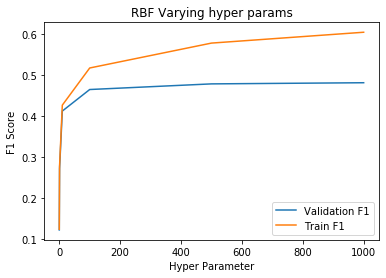

In [32]:
C = [0.1,1,10,100,500,1000]
plot_hyperparam_vs_f1score(C,cv_acc,train_acc)

In [33]:
#getting the optimal 
optimal_h_RBFSVM = opt_h
f1_RBFSVM = max(cv_acc)
print(optimal_h_RBFSVM,f1_RBFSVM)

1000 0.4817965160478713


In [28]:
#retrain on full data
clf = SVC(C = optimal_h_RBFSVM)
    
#Fit the model
clf.fit(X,Y)
    
#Compute accuracy on the training set
pred = clf.predict(test_data)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [29]:
d = {'employee_id': Emp_ID, 'is_promoted': pred}
upload_RBFSVM1 = pd.DataFrame(d)
upload_RBFSVM1.to_csv("upload_RBFSVM1.csv",index=False)